### Model Training

In [ ]:
## General libraries

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

## Modelling libraries
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from catboost import CatBoostRegressor
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error


In [36]:
df = pd.read_csv('data/stud.csv')
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


#### Preparing X and Y value

In [37]:
x=df.drop(['math_score'],axis=1)
x.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,74
1,female,group C,some college,standard,completed,90,88
2,female,group B,master's degree,standard,none,95,93
3,male,group A,associate's degree,free/reduced,none,57,44
4,male,group C,some college,standard,none,78,75


In [38]:
y=df['math_score']
y

0      72
1      69
2      90
3      47
4      76
       ..
995    88
996    62
997    59
998    68
999    77
Name: math_score, Length: 1000, dtype: int64

In [39]:
cat_features = [feature for feature in x.columns if x[feature].dtype=='O']
num_features = [feature for feature in x.columns if x[feature].dtype!='O']

In [40]:
cat_features

['gender',
 'race_ethnicity',
 'parental_level_of_education',
 'lunch',
 'test_preparation_course']

In [41]:
num_features

['reading_score', 'writing_score']

In [42]:
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.compose import ColumnTransformer

standard = StandardScaler()
ohe = OneHotEncoder()

preprocessor = ColumnTransformer(
    [
        ('Standard Scalar',standard,num_features),
        ('One Hot Encoding', ohe, cat_features)
    ]
)



In [44]:
x.shape

(1000, 7)

In [45]:
x = preprocessor.fit_transform(x)
x

array([[ 0.19399858,  0.39149181,  1.        , ...,  1.        ,
         0.        ,  1.        ],
       [ 1.42747598,  1.31326868,  1.        , ...,  1.        ,
         1.        ,  0.        ],
       [ 1.77010859,  1.64247471,  1.        , ...,  1.        ,
         0.        ,  1.        ],
       ...,
       [ 0.12547206, -0.20107904,  1.        , ...,  0.        ,
         1.        ,  0.        ],
       [ 0.60515772,  0.58901542,  1.        , ...,  1.        ,
         1.        ,  0.        ],
       [ 1.15336989,  1.18158627,  1.        , ...,  0.        ,
         0.        ,  1.        ]])

In [46]:
x.shape

(1000, 19)

In [47]:
x_train,x_test, y_train,y_test = train_test_split(x,y,test_size=0.2, random_state=42)

#### Create evaluate model

In [48]:
def evaluate_model(test,pred):
    mae = mean_absolute_error(test,pred)
    mse = mean_squared_error(test,pred)
    rmse = np.sqrt(mean_squared_error(test,pred))
    r2score = r2_score(test,pred)
    return r2score, mae, mse, rmse

In [69]:
model = {
    'LinearRegression':LinearRegression(),
    'SVM Regressor':SVR(),
    'Lasso':Lasso(),
    'Ridge':Ridge(),
    'KNeighborsRegressor':KNeighborsRegressor(),
    'AdaBoost':AdaBoostRegressor(),
    'GradientBoost':GradientBoostingRegressor(),
    'DecisionTree':DecisionTreeRegressor(),
    'RandomForestRegressor':RandomForestRegressor(),
    'CatBoost':CatBoostRegressor(logging_level='Silent')
}
model_list=[]
r2_list=[]
for i in range(len(list(model))):
    model1 = list(model.values())[i]
    model1.fit(x_train,y_train)

    y_train_pred = model1.predict(x_train)
    y_test_pred = model1.predict(x_test)

    train_r2score, train_mae, train_mse, train_rmse = evaluate_model(y_train,y_train_pred)
    test_r2score, test_mae, test_mse, test_rmse = evaluate_model(y_test,y_test_pred)

    ## For trainig data
    print(f'For {list(model.keys())[i]}')
    print('-'*35,end="\n\n")
    
    print(f'R2_score of {list(model.keys())[i]} for training dataset is {train_r2score}')
    print(f'MAE of {list(model.keys())[i]} for training dataset is {train_mae}')
    print(f'MSE of {list(model.keys())[i]} for training dataset is {train_mse}')
    print(f'RMSE of {list(model.keys())[i]} for training dataset is {train_rmse}')
    print('\n')
    ## For test data
    print(f'R2_score of {list(model.keys())[i]} for test dataset is {test_r2score}')
    print(f'MAE of {list(model.keys())[i]} for test dataset is {test_mae}')
    print(f'MSE of {list(model.keys())[i]} for test dataset is {test_mse}')
    print(f'RMSE of {list(model.keys())[i]} for test dataset is {test_rmse}',end='\n\n')

    model_list.append(list(model.keys())[i])
    r2_list.append(test_r2score)
    
    print('='*35)

For LinearRegression
-----------------------------------

R2_score of LinearRegression for training dataset is 0.8743172040139593
MAE of LinearRegression for training dataset is 4.266711846071956
MSE of LinearRegression for training dataset is 28.33487038064859
RMSE of LinearRegression for training dataset is 5.323050852720514


R2_score of LinearRegression for test dataset is 0.8804332983749565
MAE of LinearRegression for test dataset is 4.21476314247485
MSE of LinearRegression for test dataset is 29.095169866715484
RMSE of LinearRegression for test dataset is 5.393993869732842

For SVM Regressor
-----------------------------------

R2_score of SVM Regressor for training dataset is 0.8081281585902299
MAE of SVM Regressor for training dataset is 4.869189452384868
MSE of SVM Regressor for training dataset is 43.257024268031365
RMSE of SVM Regressor for training dataset is 6.57700724251018


R2_score of SVM Regressor for test dataset is 0.7286001513223705
MAE of SVM Regressor for test da

In [81]:
best_model=pd.DataFrame(list(zip(model_list,r2_list)),columns=['Models','R2 Score']).sort_values(by=['R2 Score'],ascending=False)
best_model

,Models,R2 Score
3,Ridge,0.880593
0,LinearRegression,0.880433
6,GradientBoost,0.872009
8,RandomForestRegressor,0.854671
9,CatBoost,0.851632
5,AdaBoost,0.850817
2,Lasso,0.825320
4,KNeighborsRegressor,0.783770
7,DecisionTree,0.732595
1,SVM Regressor,0.728600


### Linear Regrssion

In [91]:
model = LinearRegression()
model.fit(x_train,y_train)
y_pred = model.predict(x_test)
score = r2_score(y_test,y_pred)*100
print('Accuracy of the model is: %2f%%' %score)

Accuracy of the model is: 88.043330%


### visualize 

Text(0, 0.5, 'Predicted')

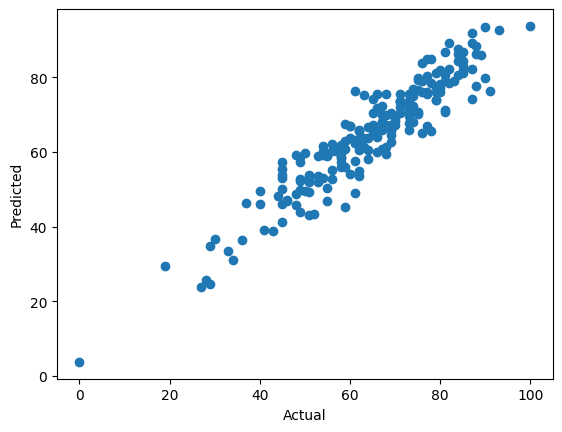

In [93]:
plt.scatter(y_test,y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')

<Axes: xlabel='math_score'>

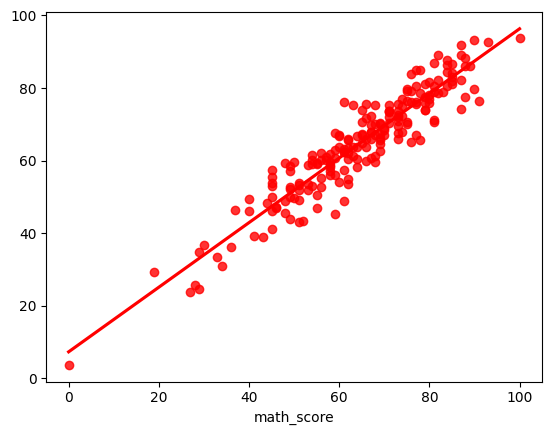

In [94]:
sns.regplot(x=y_test,y=y_pred,ci=None,color='Red')